In [1]:
#imports

import os
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import numpy as np
from numpy import reshape
import re
%matplotlib inline

In [13]:
os.chdir('/Users/andrewcaffey/Documents/Projects/Data/PCPP/Part_Scraping/GPU/pages/')

gpus = []
for i in os.listdir(os.getcwd()):
    text = open(i, "r")
    html = text.read()
    b = BeautifulSoup(html)
    data = b.find('tbody', attrs={'id':'category_content'}).find_all('tr')
    for _ in range(len(data)):
        gpu_stats = []
        for gpu_info in data[_]:
            gpu_stats.append(gpu_info)
        gpu_dict = {'Name':gpu_stats[1].text,'Series':gpu_stats[2].text,'Clock':(gpu_stats[5].text),'Chipset':(gpu_stats[3].text),'Price':gpu_stats[8].text.strip('$'),'Memory':gpu_stats[4].text}
        gpus.append(gpu_dict)
    #print data
    text.close()

In [14]:
df = pd.DataFrame(gpus)

In [15]:
clock_speed_in_ghz = [x.upper() for x in df.Clock]
clock_speed_in_ghz = [re.sub(r'[A-Z]+[A-Z]', u'', x)for x in clock_speed_in_ghz]
df['speed_mhz'] = [float(x) if x != u'N/A' else 0 for x in clock_speed_in_ghz]
df['speed_mhz'] = [x * 1000 if x < 100 else x for x in df.speed_mhz]


gpu_memory_in_mb = [x.upper() for x in df.Memory]
gpu_memory_in_mb = [re.sub(r'[A-Z]+', u'', x) for x in gpu_memory_in_mb]
gpu_memory_in_mb = [float(x) if x != u'N/A' else 0 for x in gpu_memory_in_mb]

df['memory_mb'] = [x * 1000 if x < 100 else x for x in gpu_memory_in_mb]
df['Price_float'] = [float(x) if x != '' else 0 for x in df['Price']]

df['make'] = ['NVIDIA' if 'GEFORCE' in x.upper() else 'AMD' for x in df.Chipset]

cols = ['speed_mhz', 'memory_mb', 'Price_float', 'make']



In [18]:
df = df.loc[(df[cols]!=0).all(1)]

In [19]:
df.shape

(534, 10)

In [20]:
df.make.value_counts()

NVIDIA    281
AMD       253
Name: make, dtype: int64

In [21]:
df.memory_mb.value_counts()

2000     143
4000     131
8000      95
1000      70
6000      51
3000      18
512       10
12000      9
16000      2
768        1
24000      1
256        1
32000      1
1250       1
Name: memory_mb, dtype: int64

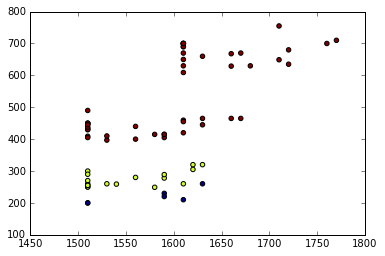

In [27]:
plt.scatter(df.speed_mhz[df.speed_mhz>1400],df.Price_float[df.speed_mhz>1400], c = df.memory_mb[df.speed_mhz>1400], s = )